In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from collections import Counter

In [79]:
dataSet=pd.read_csv("zomato_restaurants_in_India.csv");
dataSet.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [80]:
data=pd.DataFrame(dataSet)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [82]:
print(data[['average_cost_for_two', 'aggregate_rating', 'votes', 'photo_count']].describe())

       average_cost_for_two  aggregate_rating          votes    photo_count
count         211944.000000     211944.000000  211944.000000  211944.000000
mean             595.812229          3.395937     378.001864     256.971224
std              606.239363          1.283642     925.333370     867.668940
min                0.000000          0.000000     -18.000000       0.000000
25%              250.000000          3.300000      16.000000       3.000000
50%              400.000000          3.800000     100.000000      18.000000
75%              700.000000          4.100000     362.000000     128.000000
max            30000.000000          4.900000   42539.000000   17702.000000


In [83]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


Checking for null values

In [84]:
print(data.isna().any())

res_id                  False
name                    False
establishment           False
url                     False
address                  True
city                    False
city_id                 False
locality                False
latitude                False
longitude               False
zipcode                  True
country_id              False
locality_verbose        False
cuisines                 True
timings                  True
average_cost_for_two    False
price_range             False
currency                False
highlights              False
aggregate_rating        False
rating_text             False
votes                   False
photo_count             False
opentable_support        True
delivery                False
takeaway                False
dtype: bool


Filling null values present in column :: address, zipcode, cuisines, timings, opentable_support

In [85]:
data["address"].fillna("NA", inplace = True)
data["zipcode"].fillna("NA", inplace = True)
data["cuisines"].fillna("NA", inplace = True)
data["timings"].fillna("NA", inplace = True)
data["opentable_support"].fillna("NA", inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26180\1109884797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["address"].fillna("NA", inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26180\1109884797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [86]:
print(data.isna().any())

res_id                  False
name                    False
establishment           False
url                     False
address                 False
city                    False
city_id                 False
locality                False
latitude                False
longitude               False
zipcode                 False
country_id              False
locality_verbose        False
cuisines                False
timings                 False
average_cost_for_two    False
price_range             False
currency                False
highlights              False
aggregate_rating        False
rating_text             False
votes                   False
photo_count             False
opentable_support       False
delivery                False
takeaway                False
dtype: bool


Numbers of rows and columns

In [87]:
print("Rows :: ",data.shape[0])
print("Columns :: ",data.shape[1])

Rows ::  211944
Columns ::  26


List of all the columns present in dataFrame

In [88]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

Number of unique restaurants

In [89]:
data['name'].nunique()

41100

In [90]:
data['name'].count()

np.int64(211944)

Total number of restaurants/branches registered on Zomato are 211944
But 41100 out of 211944 are unique

**TOP RATED RESTAURANTS**                                                           
Problem:
identify top rated restaurants accross major cities in india and understand what make them stand out

Top 10 restaurants based on aggregate ratings

In [91]:
Top_rating=data[data['aggregate_rating']==4.9]
max_rate=Top_rating['aggregate_rating'].max()
print("Highest rating given is :: ",float(max_rate))

Highest rating given is ::  4.9


In [92]:
print("Total number of restaurants rated as 4.9 are :: ",Top_rating['name'].nunique())
Unique_restro_with_toprate=Top_rating['name'].unique()


Total number of restaurants rated as 4.9 are ::  100


In [93]:
print("THE TOP 10 RESTAURANTS WITH HIGHEST RATINGS ARE :: ")
for i in range(0,10):
    print("-> ",Unique_restro_with_toprate[i])

THE TOP 10 RESTAURANTS WITH HIGHEST RATINGS ARE :: 
->  The Salt Cafe Kitchen & Bar
->  Buttercupp
->  Yanki Sizzlers
->  TG’s - The Oriental Grill - Hyatt
->  Hotel Abdullah
->  La Roma Pizzeria
->  Green Leaf
->  Biergarten
->  Byg Brewski Brewing Company
->  Brew and Barbeque - A Microbrewery Pub


In [94]:
data[['cuisines','city']].head(10)

,cuisines,city
0,"North Indian, South Indian, Mithai, Street Foo...",Agra
1,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",Agra
2,"Fast Food, Mithai",Agra
3,"Desserts, Bakery, Fast Food, South Indian",Agra
4,"North Indian, Continental, Italian",Agra
5,"Pizza, Fast Food",Agra
6,"North Indian, Fast Food, Chinese, South Indian",Agra
7,"Pizza, Fast Food",Agra
8,"Bakery, Fast Food",Agra
9,"Cafe, Chinese, Continental, Italian, Bakery, D...",Agra


All restaurants rated as 4.9 are from 'AGRA'

Distribution of Ratings

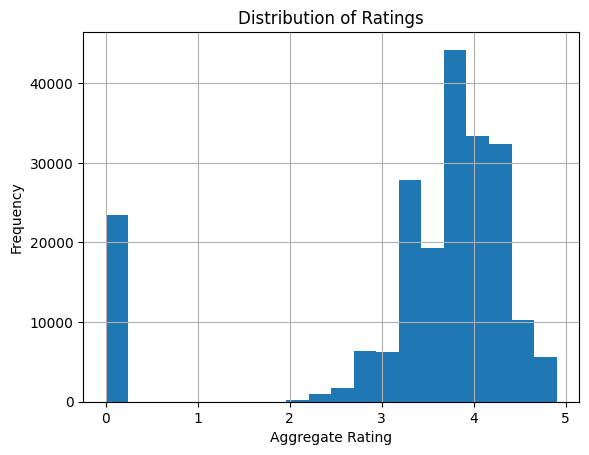

In [95]:
data['aggregate_rating'].hist(bins=20)
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

maximum ratings given are 3.9 as we can see number of ratings are above 40000

In [96]:
data.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

**Geographical Analysis**

Checking range of latitude longitude

In [97]:
# latitude typically ranges from 6.8°N to 32.9°N, and longitude ranges from 68.7°E to 97.2°E
for i in data['latitude']:
    if(i>6.5 and i<32.9):
        print("exist")
    else:
        print("ne")
for i in data['longitude']:
    if(i>68.7 and i<97.2):
        continue
    else:
        print('not exists')

exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
ne
exist
ne
exist
exist
exist
exist
exist
exist
exist
exist
ne
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
exist
ne
exist
exist
exist
ne
exist
exist
exist
exist
exist
exist
exist
exist
ne
exist
exist
exist
exist
exist
exist
ne
exist
exist
exist
exist
n

In [98]:
data['latitude'].isna().sum()
data['longitude'].isna().sum()

np.int64(0)

Visualization of cities

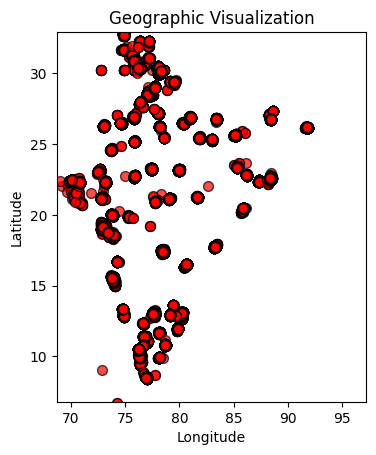

In [99]:
geometry=[Point(xy) for xy in zip(data['longitude'],data['latitude'])]
gdf=gpd.GeoDataFrame(data,geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

gdf.plot(marker='o',color='red',markersize=50,alpha=0.7,edgecolor='k')
plt.title("Geographic Visualization")
plt.xlabel("Longitude")
plt.xlim(68.7,97.2)
plt.ylabel("Latitude")
plt.ylim(6.8,32.9)
plt.show()

Cities according to latitude longitude where zomato services are available

**Cuisine Analysis**

In [100]:
# counting cuisines
cuisines_list = data['cuisines'].str.split(',').explode()
cuisine_counts = Counter(cuisines_list)

In [101]:
cuisine_df=pd.DataFrame(cuisine_counts.items(),columns=['cuisines','count'])
print(cuisine_df.sort_values(by='count',ascending=True))

          cuisines  count
220        African      1
248     Indonesian      1
231        Swedish      1
227          Bohri      1
172          Mandi      1
..             ...    ...
12     Continental  19279
18    North Indian  32719
8        Fast Food  33407
7          Chinese  46785
0     North Indian  53246

[249 rows x 2 columns]
